# Polarisation sur twitter

Constitution de groupes d'activité pro/anti chloroquine.

- Est-ce que cela correspond réellement à une polarisation ?
- Si oui, quelles sont les dimensions les plus polarisées ?

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Modèle de NLP
nlp = spacy.load("fr_core_news_sm")

## Exploration

**Reminder : attention aux descriptions qui utilisent un terme dans le sens inverse**

In [110]:
descriptions.iloc[10]

"ni rn ni lfi ⛔️hais les extrêmes, maman mariée, aime ses semblables, hais les extrêmes💗tolkien,ciné,musique,lecture ⛔️noporn🚫some pics aren't mine"

In [30]:
# Données générales
data_all = pd.read_excel("./data/all_users.xlsx")

# Liste des data_all
descriptions_all = data_all["description"].drop_duplicates()
descriptions_all = descriptions_all.dropna().apply(lambda x : x.lower())

Exploration des mots associés

In [211]:
mot = "gilets"
filtre = descriptions_all.str.contains(mot)
descriptions = descriptions_all[filtre]
print(len(descriptions))
descriptions.iloc[16]

182


'mon excellent compte twitter se fait le relais des patriotes français, des vrais gilets jaunes, des pro-trump, pro-poutine, pro-raoult et des catholiques👍'

In [213]:
descriptions_nlp = descriptions.apply(lambda x : nlp(x))
mots = [m.text for a in list(descriptions_nlp) for m in a if len(m.text)>3]
mots = Counter(mots)
mots.most_common(30)

[('giletsjaunes', 88),
 ('jaunes', 50),
 ('gilets', 49),
 ('pour', 36),
 ('stopgiletsjaunes', 25),
 ('france', 15),
 ('anti', 13),
 ('aime', 12),
 ('lrem', 11),
 ('macron2022', 11),
 ('tous', 11),
 ('contre', 10),
 ('macron', 9),
 ('frexit', 9),
 ('gauche', 9),
 ('avec', 8),
 ('tout', 8),
 ('monde', 7),
 ('nous', 7),
 ('autres', 7),
 ('être', 7),
 ('politique', 7),
 ('sans', 7),
 ('suis', 7),
 ('stop', 7),
 ('droite', 7),
 ('mais', 7),
 ('compte', 6),
 ('plus', 6),
 ('patriote', 6)]

## Production de l'analyse

**Définition des catégories**

In [214]:

dic = {
    "doctors":["medecin","médecin","urgentiste","radiologue","anesthésiste",
                "réanimateur","anesthesiste","reanimateur","chirurgien","interne","externe",
                "internat","puph","pu-ph","praticien hospitalier","docteur"],
    "engineers":["ingénieur","ingenieur","informaticien","agronome"],
    "reporters":["journaliste","pigiste","reporter","rédacteur","chroniqueur","présentateur"],
    "scientists":["chercheur","chercheuses","scientifique","doctorant","postdoc",
                 "enseignant-chercheur","enseignant chercheur","mcf","hdr","phd"],
    "nurses":["infirmier","infirmière","infirmiere"],
    "directors":["entrepreneur","chef d'entreprise","pdg"],
    "students":["étudiant","etudiant","lycéen"],
    "retired":["retraité","retraite"],
    "school teacher":["enseignant","enseignante","instituteur",
                  "institutrice","instit ","collège","école primaire"],
    "elected":[" maire","député","sénateur","sénatrice","conseiller régional","conseillier départemental"],
    
    "Right party [LR]":["les républicains"," lr ","#lr "],
    "Center party [LREM]":["lrem","république en marche","marcheur"],
    "Far-right party [RN]":["rassemblement national","front national","#rn","marine lepen"],
    "Far-left party [LFI]":["#lfi","franceinsoumise","insoumis","jlm2022"," lfi "],
    "Social protest [Gillets Jaunes]":["gilets","giletjaune","giletsjaunes"],
    
    "Marseille":["marseille","provence","paca","marseillais"],
    "Paris":["paris","parisien","parisienne"],
    
    "Biomedical research institut [INSERM]":["inserm"],
    "French research institut [CNRS]":["cnrs"]
}



Construction de la structure de données

In [215]:
# Création d'une colonne par catégorie à détecter
for cat in dic:
    data_all[cat] = data_all["description"].str.lower().str.contains("|".join(dic[cat]))

# Constitution des séries pour représentations
corpus = {}
for cat in dic:
    corpus[cat] = {}
    for p in range(1,9):
        corpus[cat][p] = 100*data_all.groupby(f"modularity_class{p}")[cat].mean()

Création du graphique

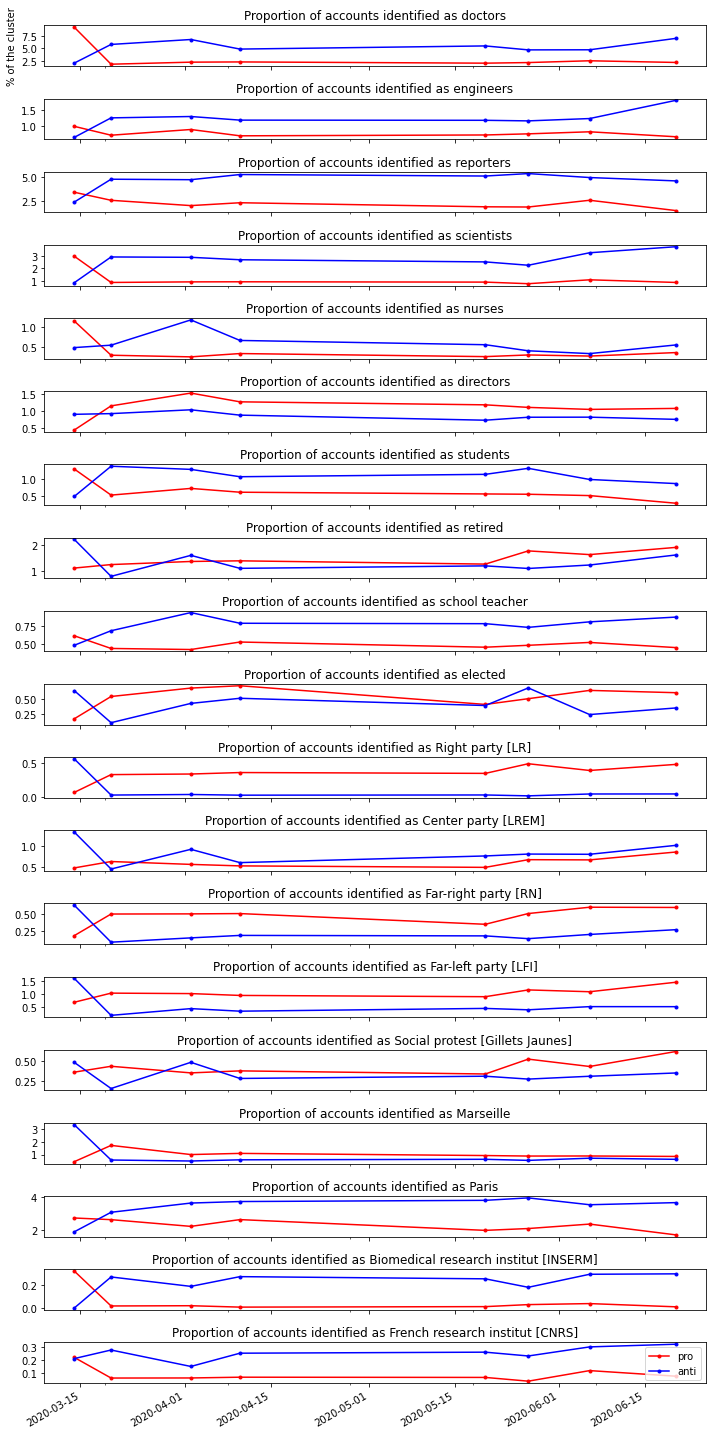

In [216]:
dates = pd.to_datetime([#"23-02-2020",
    "14-03-2020",
    "20-03-2020",
    "02-04-2020",
    "10-04-2020",
    "20-05-2020",
    "27-05-2020",
    "06-06-2020",
    "20-06-2020"],infer_datetime_format=True)

fig,ax = plt.subplots(len(dic),1,figsize=(10,20),sharex=True)

for cat,n in zip(dic,range(0,len(dic))):
    #print(cat)
    tab = pd.concat(corpus[cat],axis=1).T
    tab.index = dates
    tab[[0,1]].plot(ax=ax[n],legend=False,style=".-",color=["red","blue"])
    plt.legend(["pro","anti"])
    ax[n].set_title(f"Proportion of accounts identified as {cat}")

ax[0].set_ylabel("% of the cluster")
plt.tight_layout()

- période courte d'incertitude avec peu de tendance
- une tendance qui s'installe différenciée suivant certains clivages
- à partir de juin 2020, une augmentation de la polarisation

## Principaux comptes par période

Critère : in_degree

In [272]:
tab_pro = {}
tab_anti = {}

for i in range(0,8):
    f_pro = data_all[f"modularity_class{i}"]==0
    f_anti = data_all[f"modularity_class{i}"]==1
    
    tab_pro[f"{dates[i].year}-{dates[i].month}-{dates[i].day}"] = list(data_all[f_pro].sort_values(f"indegree{i}",ascending=False)["name"][0:5])
    #tab_pro[f"clusters {i}"] = list(data_all[f_pro].sort_values(f"indegree{i}",ascending=False)[f"modularity_class{i}"][0:5])
    
    tab_anti[f"{dates[i].year}-{dates[i].month}-{dates[i].day}"] = list(data_all[f_anti].sort_values(f"indegree{i}",ascending=False)["name"][0:5])
    #tab_anti[f"clusters {i}"] = list(data_all[f_anti].sort_values(f"indegree{i}",ascending=False)[f"modularity_class{i}"][0:5])

In [273]:
pd.concat({"anti-HCQ":pd.DataFrame(tab_anti,index=range(1,6)),
"pro-HCQ":pd.DataFrame(tab_pro,index=range(1,6))})

2020-3-14  \
anti-HCQ 1                 Mediavenir   
         2               Sanogo Oumar   
         3                 Ivoirowsky   
         4                 Toutvabien   
         5             𝐀𝐁₆𝐂𝐈𝐗⁷ ##SNK生   
pro-HCQ  1           Dominique MPUNDU   
         2           Joseph Tshilombo   
         3                      Mrs M   
         4  Union sacrée des vautours   
         5          katuala Tshibangu   

                                               2020-3-20  \
anti-HCQ 1                    𝕷'𝖍𝖊𝖚𝖗𝖊 𝖉𝖊 𝖘𝖊 𝖗𝖊𝖛𝖊𝖎𝖑𝖑𝖊𝖗.✒️   
         2                                  L’info Libre   
         3  AP-HM - Hôpitaux Universitaires de Marseille   
         4                                 ariane walter   
         5                                     RT France   
pro-HCQ  1                          Apothicaire Amoureux   
         2                                    Mediavenir   
         3                                   Julie Oudet   
         4      Ministère des Solidarités et de la Santé   
         5                                        Le Doc   

                                2020-4-2                  2020-4-10  \
anti-HCQ 1                        Le Doc  Docteur Laurent Alexandre   
         2                     Sartorius            Florian Brucker   
         3                      Fabien V                     Le Doc   
         4             Florian Gouthière                      BFMTV   
         5  Mathieu M.J. Edouard Rebeaud                   CREUSTEL   
pro-HCQ  1                      Napoléon              Didier Raoult   
         2                 ariane walter                     StOuFi   
         3                    Mediavenir              Valérie Boyer   
         4          France Bleu Provence                   ن jurumi   
         5               Etienne Campion            Jean-Marc Alric   

                               2020-5-20                     2020-5-27  \
anti-HCQ 1                      Alexis Q      C à vous / 6 À La Maison   
         2     Docteur Laurent Alexandre                 deray gilbert   
         3                        Le Doc     Docteur Laurent Alexandre   
         4  Mathieu M.J. Edouard Rebeaud                         BFMTV   
         5           Thierry de Cabarrus  Mathieu M.J. Edouard Rebeaud   
pro-HCQ  1                 Didier Raoult               Barth alexandre   
         2                    Mediavenir                     Asclépius   
         3                 Valérie Boyer                  Biobiobiobio   
         4         Philippe Douste-Blazy              Corinne Reverbel   
         5           Valeurs actuelles ن                 ariane walter   

                                          2020-6-6                 2020-6-20  
anti-HCQ 1                        Raphaël Enthoven          Raphaël Enthoven  
         2                                  Le Doc      Clément Viktorovitch  
         3                           Olivier Véran  Monsieur Ménard a 50 ans  
         4                                   BFMTV      Agence France-Presse  
         5                 Fallait Pas Supprimer 📸            Olivier Hertel  
pro-HCQ  1                           Didier Raoult              Biobiobiobio  
         2                               Asclépius                 Asclépius  
         3                           ariane walter                   Axolotl  
         4  Alertes Infos USA & Hydroxychloroquine          Corinne Reverbel  
         5                          French Daily 🌍           OSTER Elizabeth